In [1]:
import pandas as pd
import yaml

In [2]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [3]:
compressed = True
if compressed:
    df = pd.read_csv("../data/PPR-ALL-withlatlong.csv.xz", sep="\t")
else:
    df = pd.read_csv("../data/PPR-ALL-withlatlong.csv", sep="\t")

In [4]:
df.shape

(118361, 11)

In [5]:
df.drop_duplicates().shape

(116820, 11)

In [6]:
df = df[~df["geocode"].isnull()]

In [7]:
yaml.load(df["geocode"][0])

{'place_id': 172843344,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 448564134,
 'boundingbox': ['53.3023684', '53.3024442', '-6.263882', '-6.2637106'],
 'lat': '53.3024063',
 'lon': '-6.26379628582231',
 'display_name': '5, Braemor Drive, Newtown Little, Churchtown-Landscape ED, Dublin 14, Dún Laoghaire-Rathdown, County Dublin, Leinster, D14 X654, Ireland',
 'class': 'building',
 'type': 'yes',
 'importance': 0.611}

In [8]:
df["geocode"] = df["geocode"].apply(lambda x: yaml.load(x))

In [9]:
df["lat"] = df["geocode"].apply(lambda x: x["lat"]).astype("float32")

In [10]:
df["lon"] = df["geocode"].apply(lambda x: x["lon"]).astype("float32")

In [11]:
df["class"] = df["geocode"].apply(lambda x: x["class"])

In [12]:
df["importance"] = df["geocode"].apply(lambda x: x["importance"])

In [13]:
df["country"] = df["geocode"].apply(lambda x: x["display_name"].split(", ")[-1])

In [14]:
df = df[df["country"]=="Ireland"]

In [15]:
df = df[df["geocode"].astype(str).str.contains("County Dublin, ")]

In [16]:
df["price"] = df["Price (€)"].replace('[\€,]', '', regex=True).astype(float)

In [17]:
df = df[df["price"]<=1000000]

In [18]:
df.to_csv("../data/PPR-dublin-lt_1m.csv", index=False)

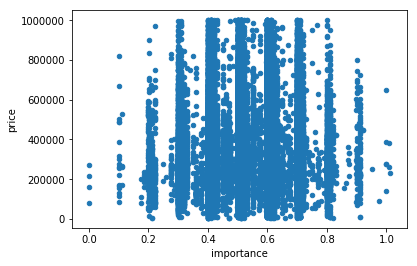

In [18]:
df[["price", "importance"]].plot.scatter(x="importance", y="price")

In [19]:
df.sort_values("lat").iloc[0]["geocode"]

{'place_id': 198760756,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 3906058,
 'boundingbox': ['53.1782636', '53.2273655', '-6.3667648', '-6.312536'],
 'lat': '53.2021265',
 'lon': '-6.3408509',
 'display_name': 'Castlekelly, Bohernabreena ED, Dublin 24, South Dublin, County Dublin, Leinster, Ireland',
 'class': 'boundary',
 'type': 'administrative',
 'importance': 0.46,
 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png'}

# Plot maps
shape files come from here: https://www.shanelynn.ie/the-irish-property-price-register-geocoded-to-small-areas/

In [20]:
sma = gpd.read_file("../data/small-areas-gps-projection/small_areas_gps.shp", )

In [21]:
dublin = sma[sma["NUTS3NAME"]=="Dublin"]

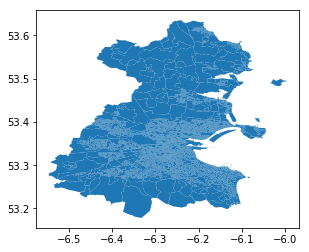

In [22]:
dublin.plot()

In [23]:
geometry = [Point(xy) for xy in zip(df["lon"], df["lat"])]

In [24]:
geo_df = gpd.GeoDataFrame(df, crs={"init":"epsg:4326"}, geometry=geometry)

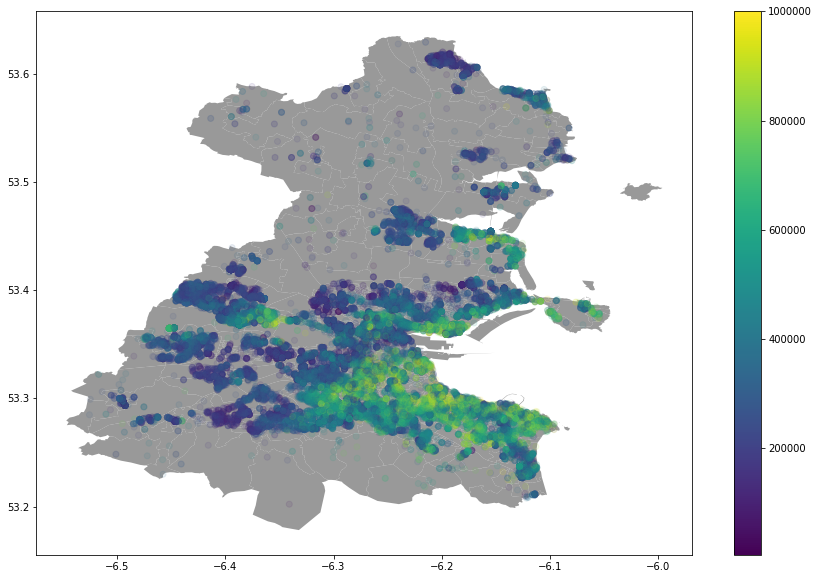

In [25]:

ax = dublin.plot(figsize=(15,10), color="grey", alpha=0.8)
geo_df.plot(ax=ax, column="price", cmap="viridis", alpha=0.1, legend=True)